<a href="https://colab.research.google.com/github/OleksiiLatypov/House_Prices/blob/main/notebookf933883802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-prices-advanced-regression-techniques:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5407%2F868283%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T140130Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D778b3ae0108e7a1a3f878b3646949d63bf48a272529301b0c206bcdf6b9dd052da4ccff8bc614ffa3ec240d0f6dfd4f7090ebddf888e86ffa1f934265bc546120930f0e6e3064b58dc8803962a9436218aac08ae310e3e312c600e4c1db1a38c1dcfc2b8ace506e5532d8be54f2379736418d1f4932a7c3ecf68e3e2e98d1da1585d4acef61860d268f3cdd41898977553775ff904226c91793208aa46b22cbfce9a53890606cd86f38c41d05597db1ffd65cb3275416dfe12d1bca48a5219bd86fe54e69d991b90b1f6a536d7c11be0c6043b63c88e269346259cea26e352169f29d8d5a06db9a20ac2798af4713b23b12926ba6607e6816d081fd7d5dd24f8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)


In [ ]:
print(f'Size of train: {train.shape}')
print(f'Size of test: {test.shape}')

Size of train: (1460, 80)
Size of test: (1459, 79)


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [ ]:
train.describe(include=['O']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [ ]:
num_columns = train.select_dtypes(include=['number']).columns.tolist()
num_columns.remove('SalePrice')

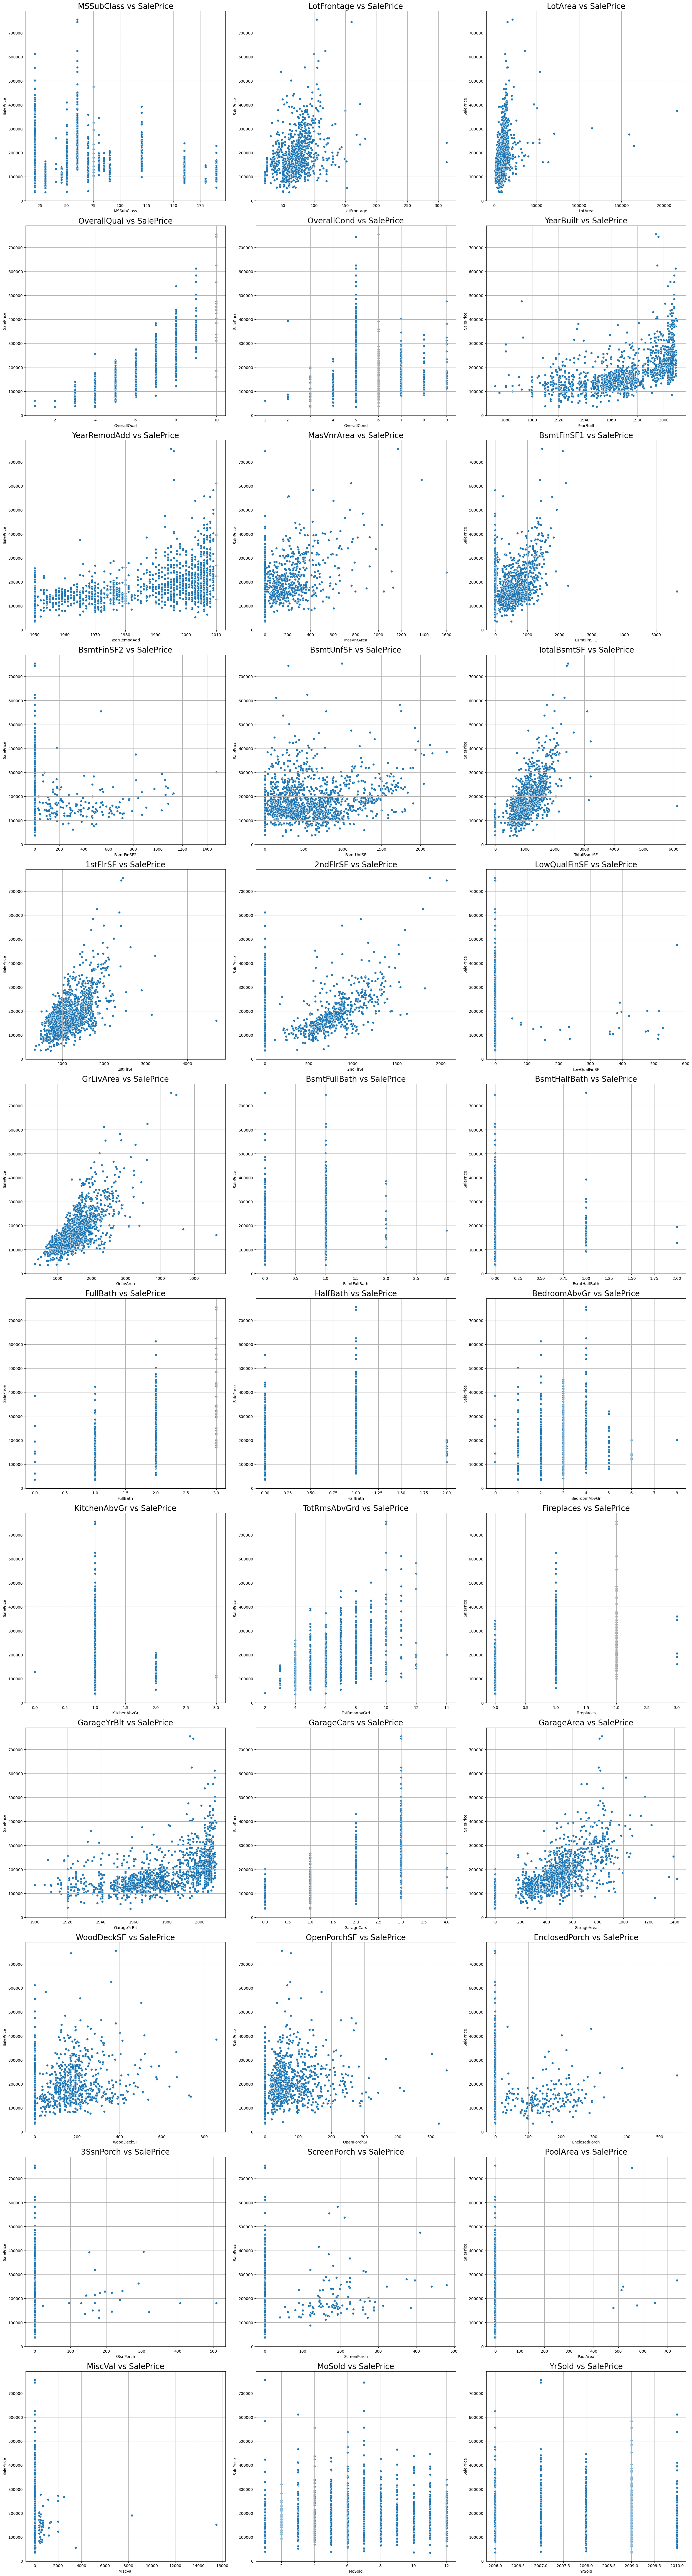

In [ ]:

#Create the figure with 3 rows and dynamic number of columns
fig, axes = plt.subplots(len(num_columns) // 3+1, 3, figsize=(25, 100))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through numerical columns and create scatter plots
for i, feature in enumerate(num_columns):
    sns.scatterplot(x=train[feature], y=train['SalePrice'], ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice', fontsize=20)
    axes[i].grid(True)


# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

    # Apply tight layout

plt.tight_layout()
plt.show()

In [ ]:
GrLivArea_outlier = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
GrLivArea_outlier

Index([523, 1298], dtype='int64')

In [ ]:
train.loc[[523, 1298], ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
1298,5642,160000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

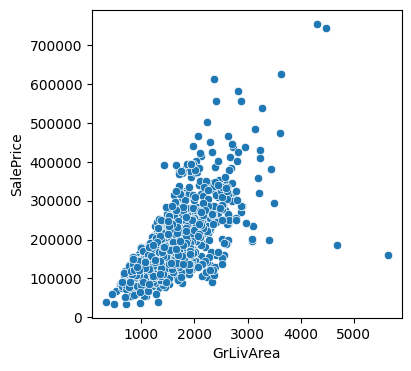

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [ ]:
train = train.drop(GrLivArea_outlier)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

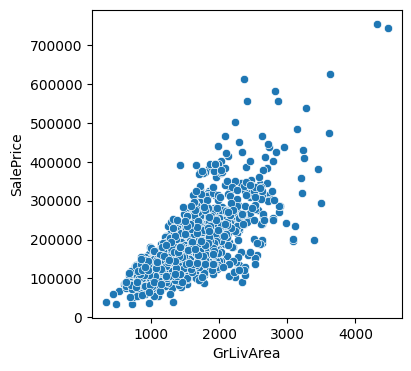

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

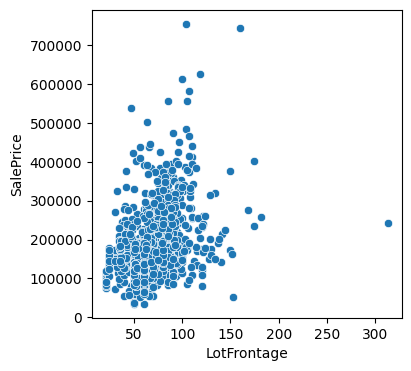

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])

In [ ]:
LotFrontage_outlier = train[train['LotFrontage']>300].index
train = train.drop(LotFrontage_outlier)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

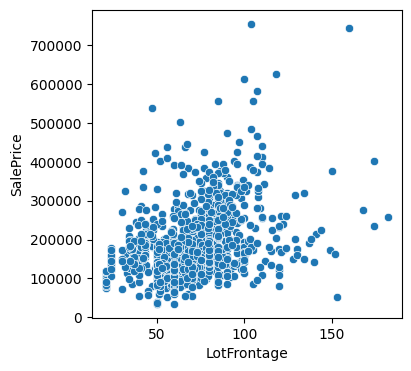

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])

In [ ]:
LotArea_outlier = train[train['LotArea'] > 60000].index
train = train.drop(LotArea_outlier)


<Axes: xlabel='LotArea', ylabel='SalePrice'>

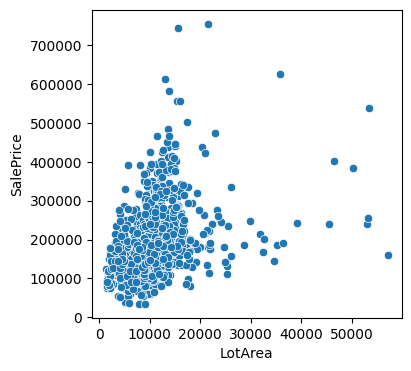

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['LotArea'], y=train['SalePrice'])

In [ ]:
TotalBsmtSF_outlier = train[train['TotalBsmtSF'] > 6000].index
train = train.drop(TotalBsmtSF_outlier)

In [ ]:
OpenPorchSF_outlier = train[train['OpenPorchSF'] > 500].index
train = train.drop(OpenPorchSF_outlier)

In [ ]:
MasVnrArea_oulier = train[(train['MasVnrArea'] > 1200) | (train['SalePrice'] > 700000)].index
train = train.drop(MasVnrArea_oulier)

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
index = train.shape[0]
index

1460

In [ ]:
all_data = pd.concat([train, test], axis=0, ignore_index=True)
all_data = all_data.drop('SalePrice', axis=1)

In [ ]:
missing_values = 100 * (all_data.isna().sum()/all_data.shape[0])
missing_data = pd.DataFrame({'Perrcentage of Missing Values': missing_values.sort_values(ascending=False)})
missing_data.head(15)

,Perrcentage of Missing Values
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071


In [ ]:
replace_to_none = ['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
'BsmtFinType2', 'FireplaceQu', 'GarageType', 'MasVnrType']

In [ ]:
for col in replace_to_none:
    if all_data[col].dtype == 'object':
        all_data.loc[:, col] = all_data.loc[:, col].fillna('None')

In [ ]:
garage_list = [col for col in all_data.columns if col.startswith('Garage')]
garage_list

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [ ]:
#na_garageyrblt_rows = all_data[all_data['GarageYrBlt'].isna()]
na_garageyrblt_rows[garage_list]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,None,NaN,None,0.0,0.0,None,None
48,None,NaN,None,0.0,0.0,None,None
78,None,NaN,None,0.0,0.0,None,None
88,None,NaN,None,0.0,0.0,None,None
89,None,NaN,None,0.0,0.0,None,None
...,...,...,...,...,...,...,...
2893,None,NaN,None,0.0,0.0,None,None
2909,None,NaN,None,0.0,0.0,None,None
2913,None,NaN,None,0.0,0.0,None,None
2914,None,NaN,None,0.0,0.0,None,None


In [ ]:
all_data = all_data.drop('GarageYrBlt', axis=1)

In [ ]:
for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
all_data['MasVnrType'].value_counts()

MasVnrType
None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64

In [ ]:
all_data['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [ ]:
all_data = all_data.drop('Utilities', axis=1)

In [ ]:
all_categorical_data = all_data.select_dtypes(include=['object']).columns.tolist()
other_categorical_data = list(set(all_categorical_data) - set(replace_to_none))
other_categorical_data

['Neighborhood',
 'Exterior1st',
 'Condition1',
 'ExterCond',
 'KitchenQual',
 'HeatingQC',
 'HouseStyle',
 'SaleCondition',
 'Heating',
 'PavedDrive',
 'LotShape',
 'MSZoning',
 'RoofMatl',
 'Condition2',
 'Electrical',
 'LandSlope',
 'ExterQual',
 'BldgType',
 'Exterior2nd',
 'Foundation',
 'RoofStyle',
 'CentralAir',
 'Street',
 'Functional',
 'SaleType',
 'LotConfig',
 'LandContour']

In [ ]:
for col in other_categorical_data:
    all_data.loc[:, col] = all_data.loc[:, col].fillna(all_data.loc[:, col].mode()[0])

In [ ]:
all_data[all_categorical_data].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
numerical_columns = all_data.select_dtypes(include=['number']).columns.tolist()
for col in numerical_columns:
    all_data.loc[:, col] = all_data.loc[:, col].fillna(all_data.loc[:, col].mean())

In [ ]:
skewness = ['GrLivArea', '1stFlrSF', 'LotArea', 'LotFrontage']
all_data[skewness] = np.log(all_data[skewness])
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.174387,9.041922,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,4.382027,9.169518,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,4.219508,9.328123,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,4.094345,9.164296,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,4.430817,9.565214,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.044522,7.568379,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,3.044522,7.546446,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,5.075174,9.903488,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,4.127134,9.253496,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
#         'YrSold', 'MoSold')
# # process columns, apply LabelEncoder to categorical features
# for c in cols:
#     lbl = LabelEncoder()
#     lbl.fit(list(all_data[c].values))
#     all_data[c] = lbl.transform(list(all_data[c].values))

# # shape
# print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 79)


In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

<Axes: >

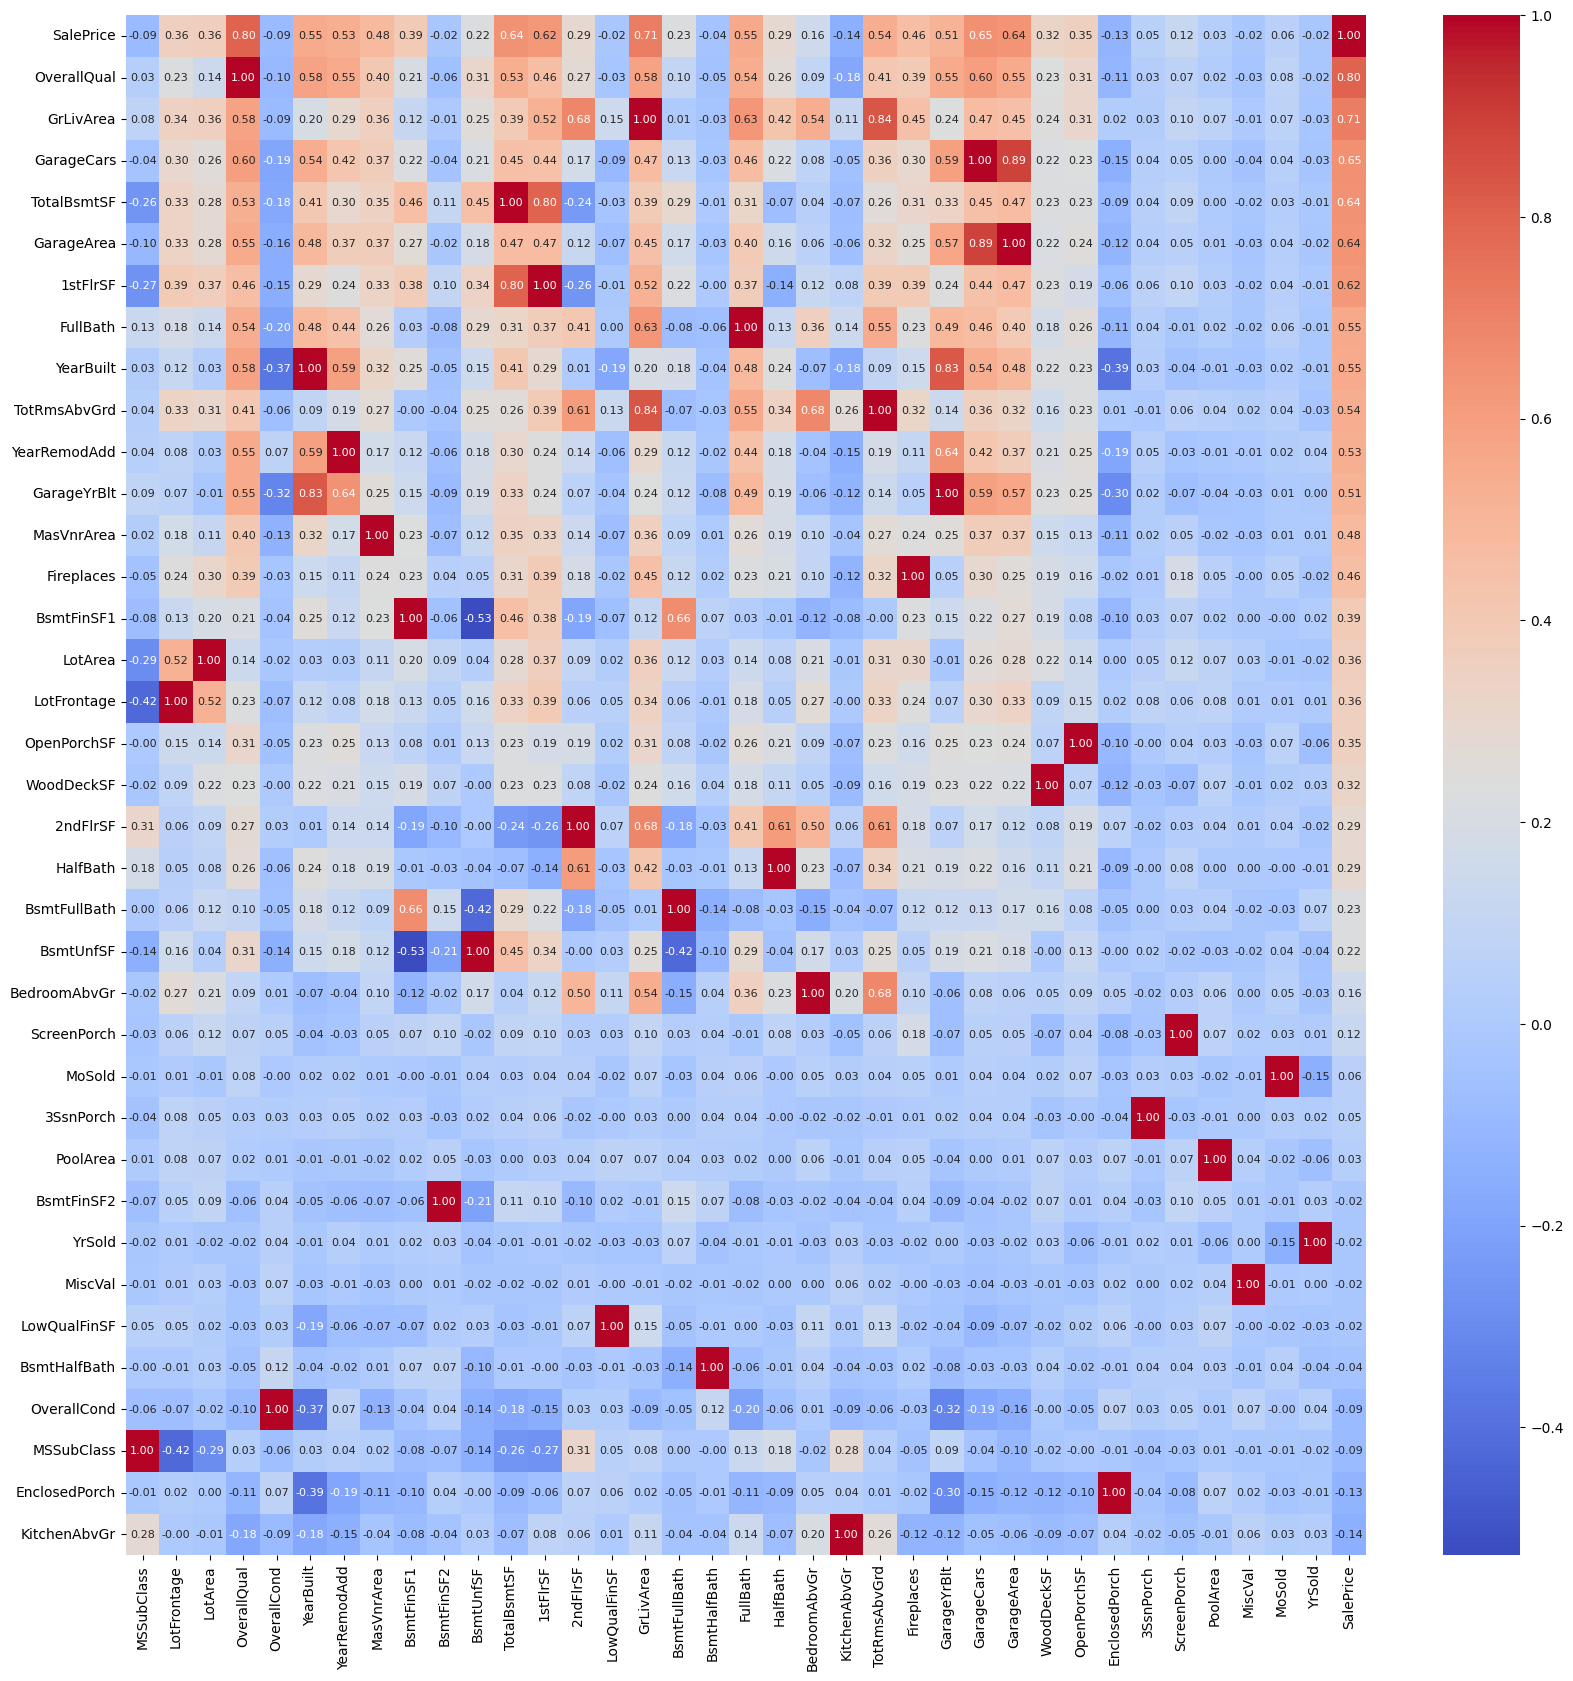

In [ ]:
plt.figure(figsize=(20, 20))
num_cols = train.select_dtypes('number')
correlation_matrix = num_cols.corr().sort_values(by='SalePrice', ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f', annot_kws={'size': 8})

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 300)


In [ ]:
train.shape

(1460, 80)

In [ ]:
y_train = np.log(train.SalePrice)
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
train_data = all_data[:index]
test_data = all_data[index:]

In [ ]:
train_data.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 300, dtype: int64

In [ ]:
train_data.shape

(1460, 300)

In [ ]:
test_data.shape

(1459, 300)

In [ ]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [ ]:
# Predict on test data
# catboost_pred = clf_catboost.predict(X_test)
clf_catboost = CatBoostRegressor(iterations=1500,
                                  learning_rate=0.04,
#                                  depth=4,
#                                  l2_leaf_reg=3,
                                 loss_function='RMSE',
#                                 border_count=40,
                                 random_seed=0,
                                 verbose=0)  # verbose=0 to suppress output during cross-validation

pipeline = Pipeline([
    #('scaler', MinMaxScaler()),
    ('model', clf_catboost)
])
# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

pipeline.fit(X_train, y_train)

Mean RMSE: 0.1234
Standard Deviation of RMSE: 0.0172


Pipeline(steps=[('model',
                 <catboost.core.CatBoostRegressor object at 0x78eba245c3d0>)])

>knn 0.214 (0.021)
>dtr 0.194 (0.018)
>svm 0.198 (0.019)
>lasso 0.168 (0.015)
>stacking 0.159 (0.015)


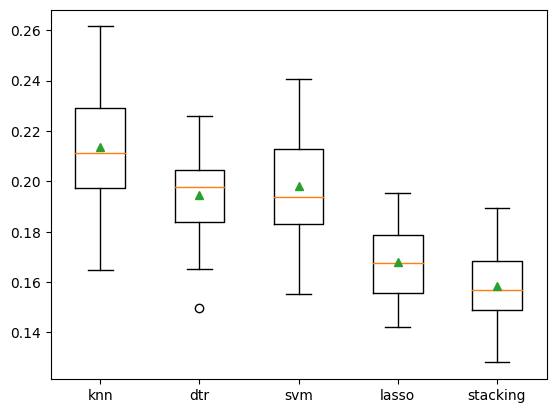

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsRegressor(n_neighbors=7)))
 level0.append(('dtr', DecisionTreeRegressor()))
 level0.append(('svm', SVR()))
 level0.append(('lasso', Lasso()))
 # define meta learner model
 level1 = GradientBoostingRegressor()
 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
 return model

# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor(n_neighbors=7)
 models['dtr'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 models['lasso'] = Lasso()
 models['stacking'] = get_stacking()
 return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
 return np.sqrt(scores)

# define dataset
X, y = X_train, y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
level0 = list()
level0.append(('knn', KNeighborsRegressor(n_neighbors=7)))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level0.append(('lasso', Lasso()))
# define meta learner model
level1 = GradientBoostingRegressor()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [ ]:
SALE = np.exp(yhat)

In [ ]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_id = test_data['Id']
test_predictions_catboost = pipeline.predict(X_test)
print(np.exp(test_predictions_catboost)[:10])
# Prepare submission
test_predictions_df = pd.DataFrame(np.exp(test_predictions), columns=['SalePrice'])
submit_df = pd.concat([test_id, test_predictions_df], axis=1)
submit_df.to_csv('submission_3.csv', index=False)


[123138.97473659 164680.2448979  188691.22117476 194225.6039945
 180998.04734945 171723.37014369 177028.67586755 163498.22375636
 180714.42312815 126770.88972512]


In [ ]:
checker=pd.read_csv('submission_3.csv')
checker.head(10)

,Id,SalePrice
0,1461,123138.974737
1,1462,164680.244898
2,1463,188691.221175
3,1464,194225.603994
4,1465,180998.047349
5,1466,171723.370144
6,1467,177028.675868
7,1468,163498.223756
8,1469,180714.423128
9,1470,126770.889725


In [ ]:
test_id = test_data['Id']
test_predictions_catboost = pipeline.predict(X_test)
print(np.exp(test_predictions_catboost)[:10])
# Prepare submission
test_predictions_catboost_df = pd.DataFrame(np.exp(test_predictions_catboost), columns=['SalePrice'])
submit_df = pd.concat([test_id, test_predictions_catboost_df], axis=1)
submit_df.to_csv('submission_n0outliers.csv', index=False)

[122720.14025252 166561.78150186 191867.0629282  199417.9255437
 182986.42458493 175705.96407815 176467.01681478 167072.6739802
 181511.06077164 122541.90839684]


In [ ]:
submit_df.head()

,Id,SalePrice
0,1461,122720.140253
1,1462,166561.781502
2,1463,191867.062928
3,1464,199417.925544
4,1465,182986.424585


In [ ]:
submit_df.shape

(1459, 2)